In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.driving import count

stats = pd.read_csv('../data/raw/movie_genre_stats.csv')

In [3]:
stats.head()

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


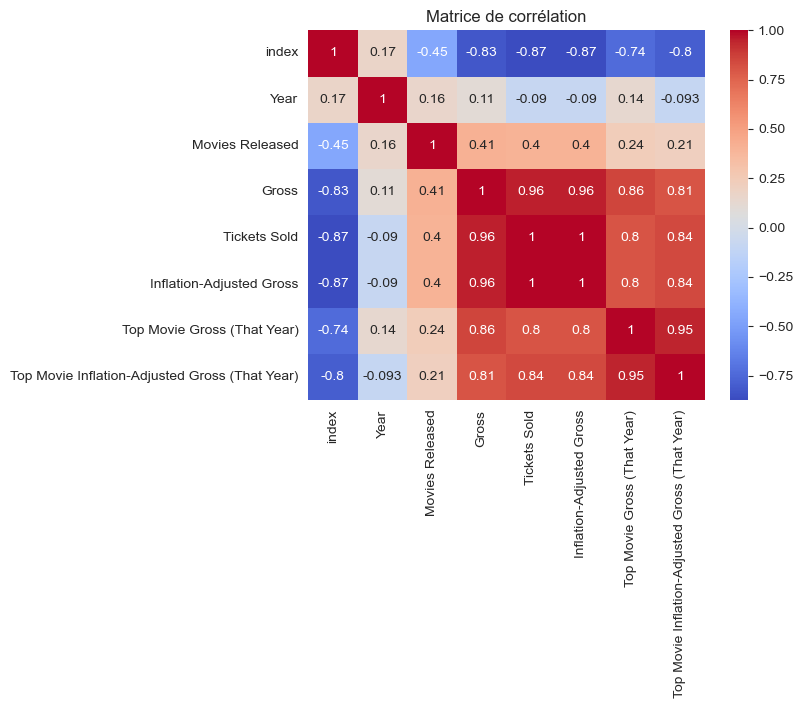

In [26]:
corr = stats.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

In [27]:
# connaitre les types des colums
stats.dtypes

index                                               int64
Genre                                              object
Year                                                int64
Movies Released                                     int64
Gross                                               int64
Tickets Sold                                        int64
Inflation-Adjusted Gross                            int64
Top Movie                                          object
Top Movie Gross (That Year)                         int64
Top Movie Inflation-Adjusted Gross (That Year)    float64
dtype: object

In [28]:
# Compter combien de films sortis pour chaque genre de film ?

# Préparer les variables

# .unique() pour faire un disctinct de SQL
genres_unique = stats['Genre'].unique()
print(genres_unique)

# préparer un dictionnaire de résultats vide pour le moment
genre_movie_release = {}

# loc de pandas: aggrégation de colums/rows selon une condition
# Ici loc: si le genre == Adventure, ajoute les movies released
print(f'Pour le genre Adventure: {stats.loc[stats.Genre == "Adventure"]["Movies Released"].sum()} films')
# en natif pandas loc ça fait:
def pandas_loc():
    count_max = 0
    for data in stats:
        if data.Genre == "Adventure":
            count_max += data["Movie Released"]
    return count_max
# Itérer sur les genres uniques
for genre in genres_unique:
# Additionner la somme des releases par genre (unifier un genre par total de releases)
# En utilisant loc de pandas
    genre_movie_release[genre] = stats.loc[stats.Genre == genre]["Movies Released"].sum()
# Produire un dictionnaire de type (key=genre, value=somme des releases): ["Adventure":12564564, "Horror": 186747645, etc]
print(genre_movie_release)

['Adventure' 'Action' 'Drama' 'Comedy' 'Thriller or Suspense' 'Horror'
 'Romantic Comedy' 'Musical' 'Documentary' 'Dark Comedy' 'Western'
 'Concert or Performance' 'Multiple Genres' 'Reality']
Pour le genre Adventure: 1005 films
{'Adventure': 1005, 'Action': 956, 'Drama': 4997, 'Comedy': 2230, 'Thriller or Suspense': 1024, 'Horror': 553, 'Romantic Comedy': 574, 'Musical': 170, 'Documentary': 2143, 'Dark Comedy': 174, 'Western': 77, 'Concert or Performance': 63, 'Multiple Genres': 39, 'Reality': 5}


<Axes: >

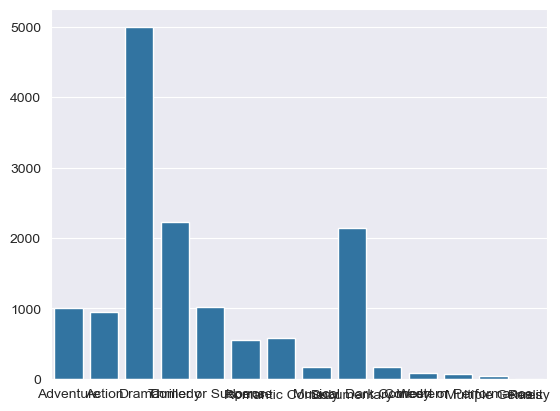

In [32]:
# Afficher dans un graphe barres

sns.barplot(genre_movie_release)

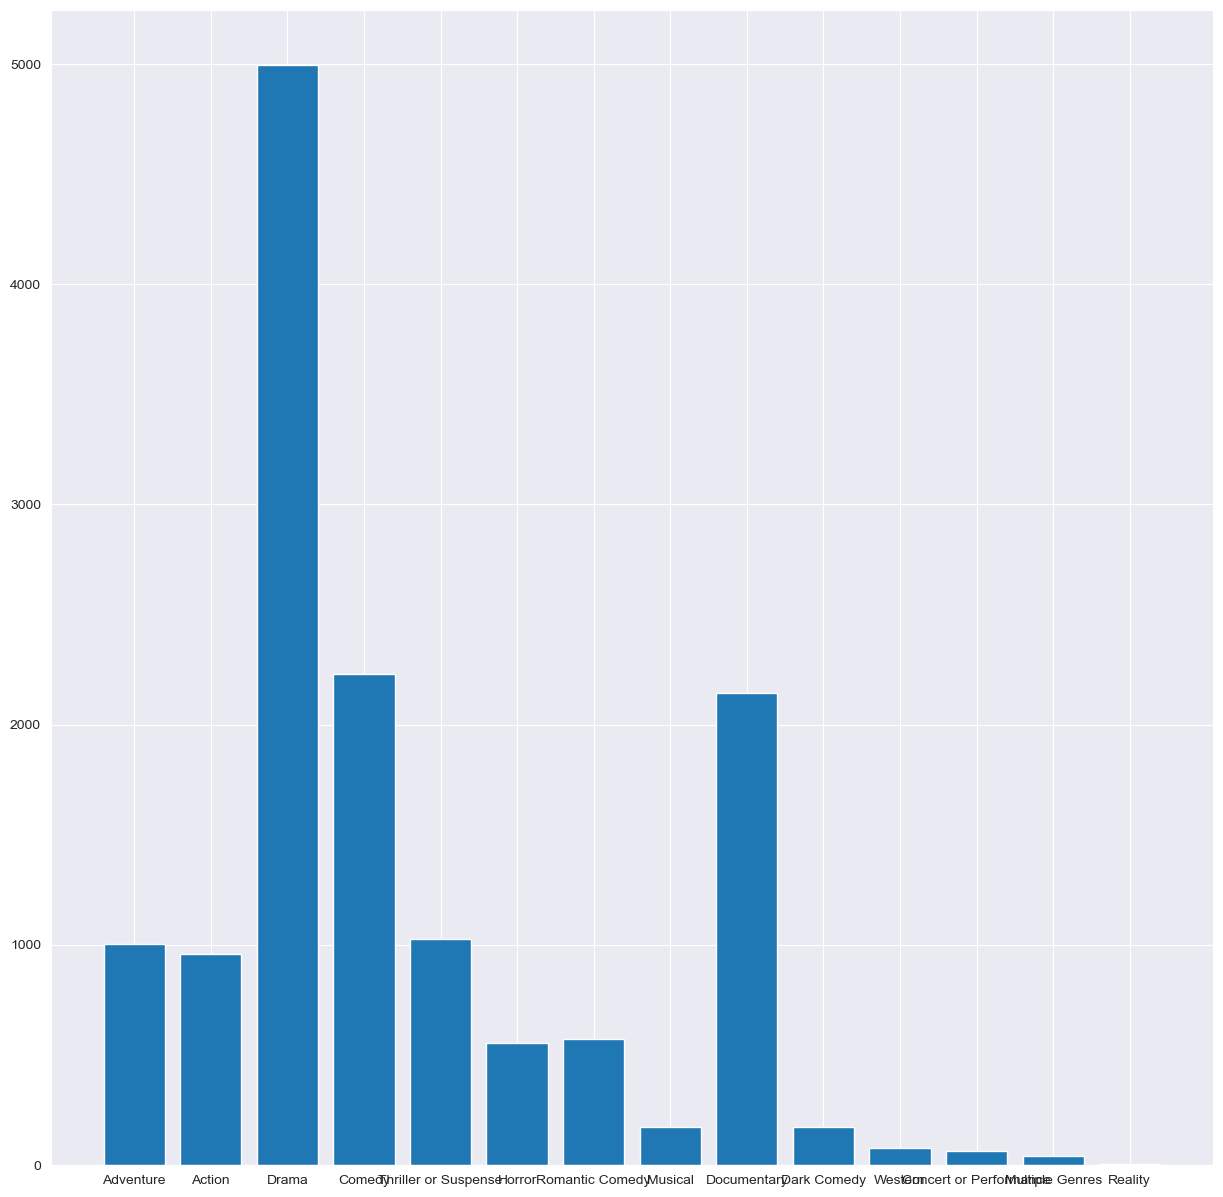

In [38]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.bar(genres_unique, genre_movie_release.values())
plt.show()